<a href="https://colab.research.google.com/github/nhamhung/Coder-School-Machine-Learning/blob/master/MLE_8_2_Tensorflow_Keras_Cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Tool Guide

&nbsp;&nbsp;&nbsp;&nbsp;<u><b>1. Environment Setup</u></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;<u><b>2. Handling Data</u></b><br>
&nbsp;&nbsp;&nbsp;&nbsp;<u><b>3. Creating Models</u></b><br>


<a id="section1"></a>

### Environment Setup

* Check Python and TensorFlow versions
* Import libraries (tf, np, pd, plt ...



In [ ]:
!python --version

Python 3.6.9


In [ ]:
# With this future statement you can slowly get accustomed to incompatible changes, by overwriting existing functions.
from __future__ import (
    absolute_import,      # perform absolute imports by default (e.g. path from root)
    division,             # changes the division operator, introduces floor division
    print_function,       # replaces old print statement with new print() function 
    unicode_literals      # introduces literal syntax for the bytes objects, e.g. b'Hello world'
    )

# Check TensorFlow installation
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.2.0


<a id="section1"></a>

### File Handling

* Create folders (*os*)
* Move files (*shutil*)
* Download files (*get_file*)
* Handle paths (*pathlib*)
* Find files (*glob*)

In [ ]:
import os         # miscellaneous operating system interfaces
import shutil     # copy, move files
from tensorflow.keras.utils import get_file # downloads file 
import pathlib    # Path handling with Path Objects, especially useful for use on different operating systems

##### **Tool: [os](https://docs.python.org/3/library/os.html)** 
This module provides a portable way of using operating system dependent functionality.

In [ ]:
!mkdir tom

In [ ]:
# Get current directory
print(os.getcwd())
# !pwd

# Get list of environment variables
print(os.environ)

# List of the names of the entries in the directory
print(os.listdir(path='.'))
# !ls .

# Create a directory named path
os.mkdir('path')
# !mkdir path

# Delete the file path
os.remove('path')

# Rename the file or directory src to dst
os.rename(src, dst)
# !mv ./tom.txt ./nhan.txt

# os.scandir(path) return an iterator of os.DirEntry
# item.is_dir() return True if the item is a directory
# item.is_file() return True if the item is a file

# Listing subdirectories
for item in os.scandir(path):
    if item.is_dir():
        print(item.name)

In [ ]:
# Delete file if exists
del_file = "testfile.txt"
if os.path.isfile(del_file):
    os.remove(del_file)
    print("File removed successfully!")
else:
    print("File does not exist!")

File does not exist!


##### **Tool: [tf.keras.utils.get_file](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file)**

In [ ]:
DATA_URL = (
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
)
data_dir = tf.keras.utils.get_file(
    fname="flower_photos",
    origin=DATA_URL,
    untar=True,
    cache_dir=".",
    cache_subdir="DataPreparation/examples/datasets",
)

228818944/228813984 [==============================] - 1s 0us/step


##### **Tool: [shutil](https://docs.python.org/3/library/shutil.html#module-shutil)**


In [ ]:
# Copy the file src to the file or directory dst
shutil.copy(src, dst)
# !cp ./src ./dst

# Move the file src to the file or directory dst
shutil.move(src, dst)
# !mv ./src ./dst

# Removing non-empty directory (-r recursively; -f force, never prompt)
shutil.rmtree('DemoDir/')
# !rm -rf DemoDir/

# Removing empty directory
os.rmdir("demoDir/")

##### **Tool: [pathlib](https://docs.python.org/3/library/pathlib.html)**
This module offers classes representing filesystem paths with semantics appropriate for different operating systems.

In [ ]:
# Listing subdirectories
path_root = pathlib.Path('.')
print([x.name for x in path_root.iterdir() if x.is_dir()])
#or
for x in path_root.iterdir():
  if x.is_dir():
    print(x.name)

In [ ]:
# Get parent directory
path = pathlib.Path('./sample_data')
str(path.parent)

In [ ]:
os.path.dirname('./tom/abc/def/ghf/sample_data.py')

##### **Tool: [glob](https://docs.python.org/3/library/glob.html)** 
This module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. 

Common Characters in comparison with Regex:

<table>
<thead><tr><td>
<b>Special Character</b></td>
<td><b>Meaning in Globs</b></td>
<td><b>Meaning in Regex</b></td>
</tr></thead><tbody><tr><td>*</td>
<td>zero or more characters</td>
<td>zero or more <i>of the character it follows</i></td>
</tr><tr><td>?</td>
<td>single occurrence of any character</td>
<td>zero or one <i>of the character it follows</i> but not more than 1</td></tr><tr><td>.</td>
<td>literal "." character</td>
<td>any single character</td>
</tr></tbody></table>

In [ ]:
# List Python source files
p = pathlib.Path('./sample_data')
list(p.glob('**/*.py')) # double asterisk matches zero or more directories

In [ ]:
# Write a file
path = Path('.editorconfig')
with path.open(mode='wt') as config:
    config.write('# config goes here')

In [ ]:
# Count number of files (wc -l only the newline count)
!ls  ../data/train/*/* | wc -l 
!ls  ../data/test/*/* | wc -l

<a id="section2"></a>

### <b>Handling Data<b>

<center><img src="https://i.imgur.com/0yACzHl.png" height="250px">
</center>

<div><b><u>1. Pre-built Datasets</b></u>

Ready-to-use Datasets from Tensorflow and Keras.

<br>
<b><u>2. Easy Input Pipelines for specific input types</b></u>

Tools for easy data input, e.g. for Image and CSV.

<br>
<b><u>3. Custom Input Pipeline</b></u>

Build a custom input pipeline for your data, to make data handling efficient and suitable for your data. This is handled with *tf.data*.

<br>
<b><u>4. Optimization</b></u>

Optimize the performance of your pipeline, e.g. through data streaming.

#### <u><b>1. Pre-built datasets</u></b>

[TensorFlow Datasets](https://github.com/tensorflow/datasets/tree/master/docs): A collection of datasets ready to use with TensorFlow. Returns tf.data.Dataset. <br>
Found in tensorflow_datasets - *tfds*.

[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets): Keras built-in datasets. Return tuple of Numpy arrays. <br>
Found in keras - *tf.keras.datasets*.

##### **Tensorflow Datasets**

In [ ]:
import tensorflow_datasets as tfds

mnist = tfds.image.MNIST()

# Describe the dataset with DatasetInfo
assert mnist.info.features['image'].shape == (28, 28, 1)
assert mnist.info.features['label'].num_classes == 10
assert mnist.info.splits['train'].num_examples == 60000
assert mnist.info.splits['test'].num_examples == 10000

# Download the data, prepare it, and write it to disk
mnist.download_and_prepare()

# Load data from disk as tf.data.Datasets
datasets = mnist.as_dataset()
train_dataset, test_dataset = datasets['train'], datasets['test']
assert isinstance(train_dataset, tf.data.Dataset)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



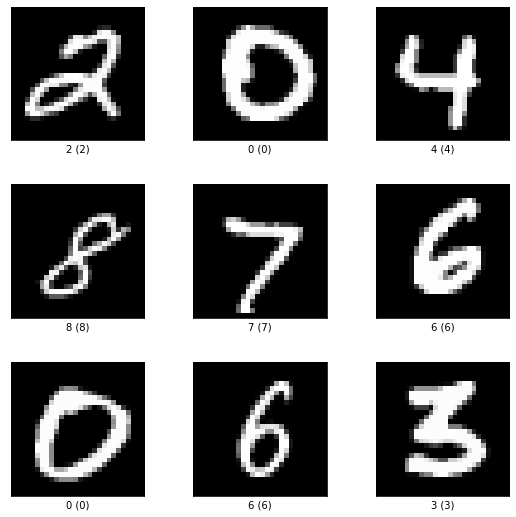

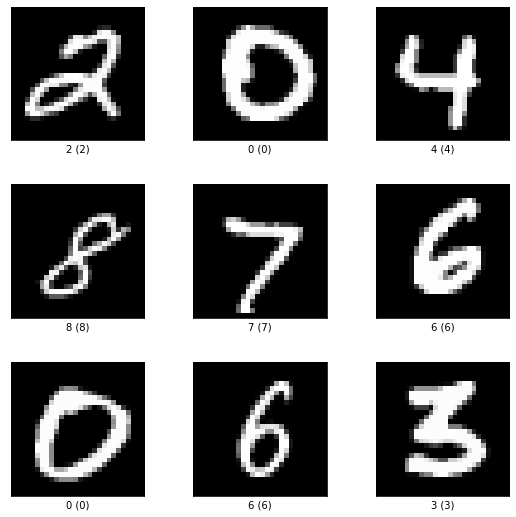

In [ ]:
print(train_dataset.element_spec)
print(mnist.info)
tfds.show_examples(mnist.info, test_dataset)

Label: 4


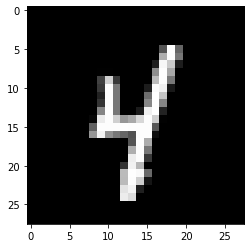

In [ ]:
for mnist_example in train_dataset.take(1):  # Only take a single example
    image, label = mnist_example["image"], mnist_example["label"]

    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

**Should you use "repeat" then "shuffle" or "shuffle" then "repeat" ?**

* Repeat, then shuffle: you lose the guarantee that all samples are processed in one epoch.
* Shuffle, then repeat: it is guaranteed that all samples will be processed before the next repeat begins, but you lose (slightly) in performance.
* To keep it simple, do all of that before batching.

In [ ]:
BATCH_SIZE = 128
NUM_EXAMPLES = 60000
NUM_TESTING = 10000

def preprocess(ds):
    """Puts the mnist dataset in the format Keras expects, (features, labels)."""
    x = tf.cast(ds['image'], tf.float32) / 255.0
    return x, ds['label']

train_dataset = train_dataset.map(preprocess).cache().repeat().shuffle(1024).batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# shorter way
mnist_data = tfds.load('mnist')
mnist_train, mnist_test = mnist_data['train'], mnist_data['test']
mnist_train = mnist_train.map(preprocess).shuffle(NUM_EXAMPLES).repeat().batch(BATCH_SIZE)
mnist_test = mnist_test.map(preprocess).batch(BATCH_SIZE)

##### **tf.keras.datasets**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(type(x_train))
plt.imshow(x_train[0], cmap='gray')
plt.show()

#### <u><b>2. Easy Input Pipelines for specific input types</u></b>

<u>Image:</u><br>
Documentation [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?version=stable). Read data [flow_from_dataframe](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?version=stable#flow_from_dataframe), [flow_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?version=stable#flow_from_directory)

<u>CSV:</u><br>
Documentation [make_csv_dataset](https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset). <br>
Found in data.experimental - *tf.data.experimental.make_csv_dataset*

##### **ImageDataGenerator**


These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

* flow_from_dataframe

In [ ]:
import pandas as pd

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

df = pd.DataFrame({'paths':train_image_paths, 'labels':label_names[train_image_labels]})

image_data = image_generator.flow_from_dataframe(df,
                                                 x_col='paths',
                                                 y_col='labels',
                                                 class_mode='sparse',
                                                 target_size=(192,192))

* flow_from_directory

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
                        TRAIN_DATA_DIR, #/dataset/train/
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        seed=102,
                        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
                        VALIDATION_DATA_DIR, #/dataset/test/
                        target_size=(IMG_WIDTH, IMG_HEIGHT),
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        class_mode='categorical')

model = build_model()
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])

# Need to calculate the steps (number of batches) precisely for train and test set
num_steps_train = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = math.ceil(float(VALIDATION_SAMPLES)/BATCH_SIZE)

#or

num_steps_train = int(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = int(float(VALIDATION_SAMPLES)/BATCH_SIZE)

model.fit(train_generator,
          steps_per_epoch = num_steps_train,
          epochs=10,
          validation_data = validation_generator,
          validation_steps = num_steps_val)

* Combine Keras ImageDataGenerator and tf.data.Dataset for the win

In [ ]:
def make_generator():
    train_datagen = ImageDataGenerator(rescale=1. / 255)
    train_generator = train_datagen.flow_from_directory(train_dataset_folder,target_size=(224, 224), class_mode='categorical', batch_size=32)
    return train_generator

train_dataset = tf.data.Dataset.from_generator(make_generator,(tf.float32, tf.float32))

##### **make_csv_dataset**

In [ ]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=32,
      label_name=LABEL_COLUMN,
      na_value="?",
      num_epochs=1,
      ignore_errors=True, 
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

#### <u><b>3. Custom Input Pipeline</u></b>

[Build custom input pipelines](https://www.tensorflow.org/guide/data).

Documentation [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset), read data [from_generator](https://www.tensorflow.org/api_docs/python/tf/data/Dataset?version=stable#from_generator), [from_tensor_slices](https://www.tensorflow.org/api_docs/python/tf/data/Dataset?version=stable#from_tensor_slices)

**tf.data.Dataset**

In [ ]:
# Basic example
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

**Yann LeCun:**

"Training with large minibatches is bad for your health<br>More importantly, it's bad for your test error.<br>Friends dont let friends use minibatches larger than 32."

arxiv.org/abs/1804.07612

In [ ]:
# Extended example
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)

BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE


# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)

#### <u><b>4. Optimization</u></b>


<u>Streaming your data:</u><br>
Serialize your data with [TFRecord](https://www.tensorflow.org/tutorials/load_data/tfrecord) to read more efficiently. Useful for streaming over a network or caching any data-preprocessing.

<u>Best practices</u>
<ul>
<li><a href="#Pipelining">Use the <code translate="no" dir="ltr">prefetch</code> transformation</a> to overlap the work of a producer and consumer.</li>
<li><a href="#Parallelizing_data_extraction">Parallelize the data reading transformation</a> using the <code translate="no" dir="ltr">interleave</code> transformation.</li>
<li><a href="#Parallelizing_data_transformation">Parallelize the <code translate="no" dir="ltr">map</code> transformation</a> by setting the <code translate="no" dir="ltr">num_parallel_calls</code> argument.</li>
<li><a href="#Caching">Use the <code translate="no" dir="ltr">cache</code> transformation</a> to cache data in memory during the first epoch</li>
<li><a href="#Map_and_batch">Vectorize user-defined functions</a> passed in to the <code translate="no" dir="ltr">map</code> transformation</li>
<li><a href="#Reducing_memory_footprint">Reduce memory usage</a> when applying the <code translate="no" dir="ltr">interleave</code>, <code translate="no" dir="ltr">prefetch</code>, and <code translate="no" dir="ltr">shuffle</code> transformations.</li>
</ul>
</div>

In [ ]:
from tf.data.experimental import AUTOTUNE

# prefetch lets the dataset fetch batches in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)

# parallelizes the data loading step, e.g. useful when data is stored remotely
ds = tf.data.Dataset.range(2).interleave(ds)

# parallelizes transformations
ds = ds.map(my_processing_function, num_parallel_calls=AUTOTUNE)

# saves some operations during training (like opening and reading files)
ds = ds.cache()

# batch before map to have it operate over a batch of inputs at once
ds = ds.batch(256).map(my_processing_function)

# cache the dataset after the map transformation except if this transformation makes the data too big to fit in memory
# In general, be aware of the time and space complexity of your transformations and set the order accordingly
ds = ds.map(time_consuming_mapping).cache().map(memory_consuming_mapping)

<a id="section3"></a>

### Creating Models

<div><b><u>1. Build Model Architecture </b></u>
<center>
<img src="https://i.imgur.com/oZmqUZE.jpg" height="180px">
</center>

Build your model with either the sequential API, functional API or through subclassing.
Use built-in layers, pre-trained models and custom implementations accordingly.

<br>
<b><u>2. Optimize Layers</b></u>

Choose the right activation function, weight initializers and regulizations.


<br>
<b><u>3. Model Compilation</b></u>

Choose the right optimizer, loss function and evaluation metrics.


<br>
<b><u>4. Optimize Training and Architecture</b></u>

Use callbacks to adjust or monitor the training process while training. <br>
You can also make use of the keras tuner to find the best hyperparamters.

#### <u><b>1. Build Model Architecture</u></b>


##### **Pre-builts**

###### Built-in Layers

via [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/)

In [ ]:
from tensorflow.keras.layers import Dense

###### Pre-trained models

via [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

In [ ]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

label_names=['cat','dog','chicken']

model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


Fine-tuning the pre-trained model

In [ ]:
mobile_net.trainable=True

print("Number of layers in the base model:", len(mobile_net.layers))

fine_tune_at = 140

for index, layer in enumerate(mobile_net.layers):
    print(index, layer.name)

for layer in mobile_net.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model: 155
0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_ex

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 1,043,843
Non-trainable params: 1,217,984
_________________________________________________________________


In [ ]:
steps_per_epoch = tf.math.ceil(0.9 * image_count/BATCH_SIZE).numpy()
val_steps_per_epoch = tf.math.ceil(0.1 * image_count/BATCH_SIZE).numpy()

fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs
history = model.fit(image_data, epochs=total_epochs, 
            steps_per_epoch=steps_per_epoch,
            callbacks = [batch_stats_callback_2],
            validation_data=test_set,
            validation_steps=val_steps_per_epoch,
            initial_epoch=initial_epochs)

NameError: ignored

##### **Sequential API**

A [Sequential model](https://www.tensorflow.org/guide/keras/sequential_model) is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.



Building a basic model

```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```

In [ ]:
model = tf.keras.models.Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# or

model = tf.keras.models.Sequential([
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
        ])

Two other basic features of Keras that you'll find useful are:

* model.summary(): prints the details of your layers in a table with the sizes of its inputs/outputs
* plot_model(): plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.

In [ ]:
# Call the model on a test input
x = tf.keras.Input(shape=(784,))
y = model(x)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
plot_model(model, to_file='mymodel.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

###### More Examples

In [ ]:
def build_lenet5():
    model = tf.keras.models.Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax'),
    ])
    return model

model = build_lenet5()
model.summary()

In [ ]:
def build_alexnet():
    model = tf.keras.models.Sequential([
        Conv2D(96, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),

        Conv2D(256, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),

        Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    return model

model = build_alexnet()
model.summary()

##### **Functional API**

The [Keras functional API](https://www.tensorflow.org/guide/keras/functional) is a way to create models that is more flexible than the tf.keras.Sequential API.


We're now building the same model as in the sequential API.

```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```


In [ ]:
inputs = tf.keras.Input(shape=(784,))
dense = tf.keras.layers.Dense(64, activation="relu")
x = dense(inputs)

x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="func_model")

In [ ]:
model.summary()

#### <u><b>2. Optimize Layers</u></b>


##### **Activation Functions**

Choosing activation functions via [tf.keras.activations](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations)


In [ ]:
# e.g. sigmoid
Dense(64, activation=tf.keras.activations.sigmoid)

##### **Initializers**

Initializing the layer parameters via [tf.keras.initializers](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers)


In [ ]:
tf.random_normal_initializer(
    mean=0.0, stddev=0.05, seed=None
)

##### **Regulizers**

Applying regularization to the layer parameters (to prevent overfitting) via [tf.keras.regularizers](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/regularizers)

**These layers expose 3 keyword arguments:**

* kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
* bias_regularizer: Regularizer to apply a penalty on the layer's bias
* activity_regularizer: Regularizer to apply a penalty on the layer's output




In [ ]:
layer = tf.keras.layers.Dense(
    5,
    kernel_initializer=tf.keras.regularizers.l1(0.01),
    kernel_regularizer=tf.keras.regularizers.l1(0.01),
    activity_regularizer=tf.keras.regularizers.l2(0.01))

#### <u><b>3. Model Compilation</u></b>


##### **Optimizers**

Optimizers via [tf.keras.optimizers](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers)


In [ ]:
# e.g. adam
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

##### **Loss functions**

Loss functions via [tf.keras.losses](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses)

In [ ]:
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy())

#or

model.compile(optimizer=adam, loss=tf.keras.losses.CategoricalCrossentropy())

##### **Metrics**

Performance metrics via [tf.keras.metrics](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics)


In [ ]:
model.compile('sgd', loss='mse', metrics=[tf.keras.metrics.Accuracy()])

#or

model.compile('sgd', loss='mse', metrics=['accuracy'])

#### <u><b>4. Optimize Training and Architecture</u></b>


## Extras

##### **Keras Tuner**

`python3 -m pip install -U keras-tuner`

Documentation [Keras Tuner](https://keras-team.github.io/keras-tuner/)

In [ ]:
!python3 -m pip install -U keras-tuner

     |████████████████████████████████| 61kB 6.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=dad872120f4dbcd8df810e77d3db6894479aa27ffb0ce1ee5c0b8f05b563b8cf
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=9aafafc87679413ebbc54c3c6fbb21441da1c897955a8250079d75180647c765
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


**Example with basic dense layers**

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')   

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

    

tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(img_train, label_train, epochs = 10, validation_data = (img_test, label_test))

**Example with CNN model**

In [ ]:
import kerastuner as kt
import tensorflow as tf

def build_model(hp):
    """Builds a convolutional model."""
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = inputs
    for i in range(hp.Int('conv_layers', 1, 3, default=3)):
        x = tf.keras.layers.Conv2D(
            filters=hp.Int('filters_' + str(i), 4, 32, step=4, default=8),
            kernel_size=hp.Int('kernel_size_' + str(i), 3, 5),
            activation='relu',
            padding='same')(x)

        if hp.Choice('pooling' + str(i), ['max', 'avg']) == 'max':
            x = tf.keras.layers.MaxPooling2D()(x)
        else:
            x = tf.keras.layers.AveragePooling2D()(x)

        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)

    if hp.Choice('global_pooling', ['max', 'avg']) == 'max':
        x = tf.keras.layers.GlobalMaxPooling2D()(x)
    else:
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
import tensorflow_datasets as tfds

def preprocess(ds):
    """Puts the mnist dataset in the format Keras expects, (features, labels)."""
    x = tf.cast(ds['image'], tf.float32) / 255.0
    return x, ds['label']

mnist_data = tfds.load('mnist')
mnist_train, mnist_test = mnist_data['train'], mnist_data['test']
mnist_train = mnist_train.map(preprocess).shuffle(1000).batch(100).repeat()
mnist_test = mnist_test.map(preprocess).batch(100)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
# Runs the hyperparameter search.

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='results_dir',
    project_name='mnist')

tuner.search(mnist_train,
             steps_per_epoch=600,
             validation_data=mnist_test,
             validation_steps=100,
             epochs=20,
             callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy')])

Epoch 1/20
600/600 [==============================] - 13s 22ms/step - loss: 1.2972 - accuracy: 0.5842 - val_loss: 0.9042 - val_accuracy: 0.7174
Epoch 2/20
600/600 [==============================] - 13s 21ms/step - loss: 0.5745 - accuracy: 0.8223 - val_loss: 0.4956 - val_accuracy: 0.8437
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.4111 - accuracy: 0.8790 - val_loss: 0.4063 - val_accuracy: 0.8767
Epoch 4/20
600/600 [==============================] - 10s 17ms/step - loss: 0.3395 - accuracy: 0.9007 - val_loss: 0.4459 - val_accuracy: 0.8628
Epoch 1/20
600/600 [==============================] - 13s 22ms/step - loss: 1.3834 - accuracy: 0.5435 - val_loss: 0.9306 - val_accuracy: 0.6987
Epoch 2/20
600/600 [==============================] - 11s 19ms/step - loss: 0.5337 - accuracy: 0.8372 - val_loss: 0.4227 - val_accuracy: 0.8695
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.3877 - accuracy: 0.8829 - val_loss: 0.3933 - val_accuracy:

Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 0.6650 - accuracy: 0.8317 - val_loss: 0.5789 - val_accuracy: 0.9115
Epoch 2/20
600/600 [==============================] - 11s 19ms/step - loss: 0.2103 - accuracy: 0.9509 - val_loss: 0.1762 - val_accuracy: 0.9595
Epoch 3/20
600/600 [==============================] - 11s 18ms/step - loss: 0.1447 - accuracy: 0.9629 - val_loss: 0.1380 - val_accuracy: 0.9616
Epoch 4/20
600/600 [==============================] - 12s 20ms/step - loss: 0.1152 - accuracy: 0.9700 - val_loss: 0.1105 - val_accuracy: 0.9707
Epoch 5/20
600/600 [==============================] - 11s 18ms/step - loss: 0.0977 - accuracy: 0.9742 - val_loss: 0.1446 - val_accuracy: 0.9600
Epoch 1/20
600/600 [==============================] - 14s 24ms/step - loss: 0.6598 - accuracy: 0.8379 - val_loss: 0.4266 - val_accuracy: 0.9192
Epoch 2/20
600/600 [==============================] - 12s 20ms/step - loss: 0.1803 - accuracy: 0.9571 - val_loss: 0.1736 - val_accuracy:

Epoch 1/20
600/600 [==============================] - 13s 22ms/step - loss: 0.8909 - accuracy: 0.7402 - val_loss: 0.6939 - val_accuracy: 0.7965
Epoch 2/20
600/600 [==============================] - 11s 18ms/step - loss: 0.3413 - accuracy: 0.9042 - val_loss: 0.3098 - val_accuracy: 0.9098
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.2527 - accuracy: 0.9283 - val_loss: 0.2490 - val_accuracy: 0.9276
Epoch 4/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2100 - accuracy: 0.9395 - val_loss: 0.1923 - val_accuracy: 0.9394
Epoch 5/20
600/600 [==============================] - 10s 17ms/step - loss: 0.1828 - accuracy: 0.9466 - val_loss: 0.1672 - val_accuracy: 0.9492
Epoch 6/20
600/600 [==============================] - 10s 17ms/step - loss: 0.1635 - accuracy: 0.9515 - val_loss: 0.1712 - val_accuracy: 0.9464
Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 0.6903 - accuracy: 0.8067 - val_loss: 0.5348 - val_accuracy:

Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 1.1855 - accuracy: 0.7842 - val_loss: 0.9556 - val_accuracy: 0.9350
Epoch 2/20
600/600 [==============================] - 12s 20ms/step - loss: 0.4387 - accuracy: 0.9530 - val_loss: 0.2811 - val_accuracy: 0.9624
Epoch 3/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2387 - accuracy: 0.9664 - val_loss: 0.1772 - val_accuracy: 0.9727
Epoch 4/20
600/600 [==============================] - 12s 20ms/step - loss: 0.1671 - accuracy: 0.9721 - val_loss: 0.1325 - val_accuracy: 0.9753
Epoch 5/20
600/600 [==============================] - 11s 18ms/step - loss: 0.1307 - accuracy: 0.9762 - val_loss: 0.1139 - val_accuracy: 0.9794
Epoch 6/20
600/600 [==============================] - 11s 18ms/step - loss: 0.1094 - accuracy: 0.9792 - val_loss: 0.0971 - val_accuracy: 0.9822
Epoch 7/20
600/600 [==============================] - 11s 18ms/step - loss: 0.0947 - accuracy: 0.9813 - val_loss: 0.0815 - val_accuracy:

Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 1.1766 - accuracy: 0.7877 - val_loss: 0.9187 - val_accuracy: 0.8067
Epoch 2/20
600/600 [==============================] - 11s 18ms/step - loss: 0.3350 - accuracy: 0.9509 - val_loss: 0.2640 - val_accuracy: 0.9427
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.1847 - accuracy: 0.9642 - val_loss: 0.1613 - val_accuracy: 0.9672
Epoch 4/20
600/600 [==============================] - 11s 19ms/step - loss: 0.1334 - accuracy: 0.9707 - val_loss: 0.1564 - val_accuracy: 0.9601
Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 1.1114 - accuracy: 0.8075 - val_loss: 0.9474 - val_accuracy: 0.8269
Epoch 2/20
600/600 [==============================] - 11s 19ms/step - loss: 0.3396 - accuracy: 0.9465 - val_loss: 0.3150 - val_accuracy: 0.9385
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.1888 - accuracy: 0.9628 - val_loss: 0.2063 - val_accuracy:

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'conv_layers': 3,
 'filters_0': 16,
 'filters_1': 28,
 'filters_2': 20,
 'global_pooling': 'avg',
 'kernel_size_0': 3,
 'kernel_size_1': 4,
 'kernel_size_2': 4,
 'optimizer': 'sgd',
 'pooling0': 'max',
 'pooling1': 'avg',
 'pooling2': 'avg'}

##### **Callbacks**

`model.fit(dataset, ..,  callbacks=[..])`

Write your own (early stopping) Callback e.g. like this.

In [ ]:
class EarlyStopper(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.998:
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True
es_callback = EarlyStopper()

**Batch stats**

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []
        self.batch_val_losses = []
        self.batch_val_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        # reset_metrics: the metrics returned will be only for this batch. 
        # If False, the metrics will be statefully accumulated across batches.
        self.model.reset_metrics()
  
    def on_test_batch_end(self, batch, logs=None):
        self.batch_val_losses.append(logs['loss'])
        self.batch_val_acc.append(logs['acc'])
        # reset_metrics: the metrics returned will be only for this batch. 
        # If False, the metrics will be statefully accumulated across batches.
        self.model.reset_metrics()

def plot_stats(training_stats, val_stats, x_label='Training Steps', stats='loss'):
    stats, x_label = stats.title(), x_label.title()
    legend_loc = 'upper right' if stats=='loss' else 'lower right'
    training_steps = len(training_stats)
    test_steps = len(val_stats)

    plt.figure()
    plt.ylabel(stats)
    plt.xlabel(x_label)
    plt.plot(training_stats, label='Training' + stats)
    plt.plot(np.linspace(0, training_steps, test_steps), val_stats, label='Validation' + stats)
    plt.ylim([0,max(plt.ylim())])
    plt.legend(loc=legend_loc)
    plt.show()

batch_stats_callback = CollectBatchStats()

**Early Stopping**

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    # Stop training when `val_loss` is no longer improving
    monitor='val_loss',
    # "no longer improving" being defined as "no better than 1e-2 less"
    min_delta=1e-2,
    # "no longer improving" being further defined as "for at least 2 epochs"
    patience=2,
    verbose=1)

**Model Checkpointing**

In [ ]:
keras.callbacks.ModelCheckpoint(
        filepath='mymodel_{epoch}.h5',
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        save_best_only=True,
        monitor='val_loss',
        verbose=1)

**Learning rate schedule**

Several built-in schedules are available: ExponentialDecay,PiecewiseConstantDecay, PolynomialDecay, and InverseTimeDecay.

Documentation [tf.keras.optimizers.schedules](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [ ]:
# best normal learning rate = 0.0001 -> 0.0005 -> 0.001

initial_learning_rate = 0.1

lr_schedule = keras.optimizers.schedules.ExponentialDecay
(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

**TensorBoard**

In [ ]:
keras.callbacks.TensorBoard(
  log_dir='/full_path_to_your_logs',
  histogram_freq=0,  # How often to log histogram visualizations
  embeddings_freq=0,  # How often to log embedding visualizations
  update_freq='epoch')  # How often to write logs (default: once per epoch)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
# You should be able to launch TensorBoard from the command line
%tensorboard --logdir ./logs/

**Plot the result**


In [ ]:
# Take 1 batch out to test
for image_batch, label_batch in test_set:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=1)
predicted_label_batch = label_names[predicted_id]

In [ ]:
# Plot the result
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow((image_batch[n]+1)/2)
    color = "green" if predicted_id[n] == label_batch.numpy()[n] else "red"
    plt.title(predicted_label_batch[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

**Error Analysis**

In [ ]:
ground_truth = validation_generator.classes
filenames = validation_generator.filenames
label_to_index = validation_generator.class_indices
index_to_label = dict((v,k) for k, v in label_to_index.items())
predictions = model.predict_generator(validation_generator, steps=None)

# prediction_table is a dict with index, prediction, ground truth
prediction_table = {}
for index, val in enumerate(predictions):
    # get argmax index
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [value_of_highest_probability, 
                               index_of_highest_probability, 
                               ground_truth[index]]
assert len(predictions) == len(ground_truth) == len(prediction_table)

In [ ]:
def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
    sorted_prediction_table = [(k, prediction_table[k])
                               for k in sorted(prediction_table,
                                               key=prediction_table.get,
                                               reverse=get_highest_probability)
                               ]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append(
                        [image_index, [probability, predicted_index, gt]])
            else:
                result.append(
                    [image_index, [probability, predicted_index, gt]])
    return result[:number_of_items]

def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)
        
def display(sorted_indices, message):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indices:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(VALIDATION_DATA_DIR + filenames[name])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

In [ ]:
most_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, True, 1, 10, False)
message = 'Images with highest probability of containing dogs'
display(most_confident_dog_images, message)

least_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, False, 1, 10, False)
message = 'Images with lowest probability of containing dogs'
display(least_confident_dog_images, message)

incorrect_dog_images = get_images_with_sorted_probabilities(prediction_table, True, 1, 10, True)
message = 'Images of cats with highest probability of containing dogs'
display(incorrect_dog_images, message)